In [1]:
import osmnx as ox
import geopandas as gpd

In [2]:
polygone = gpd.read_file('/home/fouzai/extraction_tissu_urbain/Macapa/couche/urbain_gutemberg_macapa.shp')
polygone = polygone.to_crs(4326)
macapa_polygone = polygone.iloc[0]['geometry']
#macapa_polygone = polygone['geometry']


In [3]:
macapa_street = ox.graph_from_polygon(macapa_polygone, network_type='drive', simplify=True)

/home/fouzai/anaconda3/envs/iota2-env/lib/python3.6/site-packages/osmnx/utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/home/fouzai/anaconda3/envs/iota2-env/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/home/fouzai/anaconda3/envs/iota2-env/lib/python3.6/site-packages/osmnx/utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [4]:
macapa_street_projected = ox.project_graph(macapa_street)

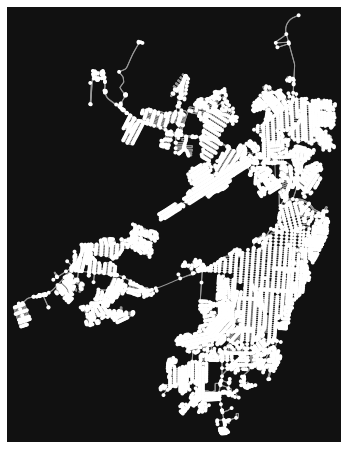

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(macapa_street_projected)

In [42]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(macapa_street_projected)

In [68]:
gdf_edges.columns

Index(['osmid', 'oneway', 'ref', 'highway', 'length', 'geometry', 'junction',
       'name', 'lanes', 'maxspeed', 'bridge', 'access'],
      dtype='object')

In [69]:
gdf_nodes.columns

Index(['y', 'x', 'street_count', 'lon', 'lat', 'highway', 'geometry'], dtype='object')

In [65]:
gdf_edges['geometry']


u            v            key
320212456    5001853797   0      LINESTRING (485902.368 12384.126, 485905.750 1...
5001853797   5001853803   0      LINESTRING (485916.566 12203.000, 485918.780 1...
320212462    1753382445   0      LINESTRING (485993.843 11587.810, 485997.582 1...
1753382445   1753382422   0      LINESTRING (485985.509 11639.262, 485974.771 1...
             6933864134   0      LINESTRING (485985.509 11639.262, 485968.273 1...
                                                       ...                        
10296301642  10296301643  0      LINESTRING (489137.099 -1041.979, 489222.069 -...
10297480692  10297480691  0      LINESTRING (489758.348 -687.641, 489824.991 -6...
10297480697  10297480703  0      LINESTRING (488966.937 1095.432, 488972.279 10...
10297480704  10297480703  0      LINESTRING (488997.104 1134.151, 489003.013 11...
10297632702  10297632706  0      LINESTRING (489948.317 -1394.095, 489949.397 -...
Name: geometry, Length: 16847, dtype: geometry

In [73]:
gdf_nodes['street_count']

osmid
320212456      3
5001853797     3
320212462      3
1753382445     3
320212559      3
              ..
10296301642    1
10297480692    1
10297480697    1
10297480704    1
10297632702    1
Name: street_count, Length: 5985, dtype: int64

In [57]:
extended_stats=ox.extended_stats(macapa_street_projected, bc=True)

/home/fouzai/anaconda3/envs/iota2-env/lib/python3.6/site-packages/osmnx/stats.py:405: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)


In [61]:
extended_stats.keys

<function dict.keys>

In [62]:
st_connected_component=ox.utils_graph.get_largest_component(macapa_street_projected,strongly=True)

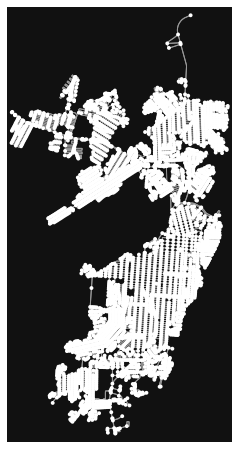

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [63]:
ox.plot_graph(st_connected_component)

In [36]:
ox.save_graph_shapefile(macapa_street_projected,filepath='/home/fouzai/extraction_tissu_urbain/Macapa/donnees_OSM/street_python/')

/home/fouzai/anaconda3/envs/iota2-env/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [64]:
ox.save_graph_shapefile(st_connected_component,filepath='/home/fouzai/extraction_tissu_urbain/Macapa/donnees_OSM/street_python/connected_component/')

/home/fouzai/anaconda3/envs/iota2-env/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


### Ce notebook a été créé par Youssef Fouzai : youssef.fouzai@ird.fr